In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"D:\Codes\MLproject\notebook\data\raw.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
#finding shape of data
df.shape

(1000, 8)

In [8]:
#finding missing value
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
#finding duplicate
df.duplicated().sum()

0

In [10]:
#check datatypes and information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#unique values in all columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
#checking statistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


####  EDA with categorical values

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
#unique values from categorical data

print("Categories in 'gender' variable: ", end = "")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = "")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = "")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = "")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = "")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [16]:
#define the numercial and categorical data diffrently
numberical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

#print the values
print("Total {} Numerical Features : {}".format(len(numberical_features), numberical_features))
print("Total {} Categorical Features : {}".format(len(categorical_features), categorical_features))

Total 3 Numerical Features : ['math_score', 'reading_score', 'writing_score']
Total 5 Categorical Features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [18]:
#create the 'average' and 'total score' folder 
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
#finding no of students who got full marks in all subjects
math_full = df[df["math_score"] == 100]["average"].count()
reading_full = df[df["reading_score"] == 100]["average"].count()
writing_full = df[df["writing_score"] == 100]["average"].count()

#printing the total values
print(f"Total students got full marks in -")
print(f"Maths : {math_full}")
print(f"writing : {writing_full}")
print(f"Reading : {reading_full}")

Total students got full marks in -
Maths : 7
writing : 14
Reading : 17


In [29]:
#finding no of students who got less than 20 marks in all subjects
math_full = df[df["math_score"] <= 20]["average"].count()
reading_full = df[df["reading_score"] <= 20]["average"].count()
writing_full = df[df["writing_score"] <= 20]["average"].count()

#printing the total values
print(f"Total students got less than 20 marks in -")
print(f"Maths : {math_full}")
print(f"writing : {writing_full}")
print(f"Reading : {reading_full}")

Total students got less than 20 marks in -
Maths : 4
writing : 3
Reading : 1


#### Visualization of data

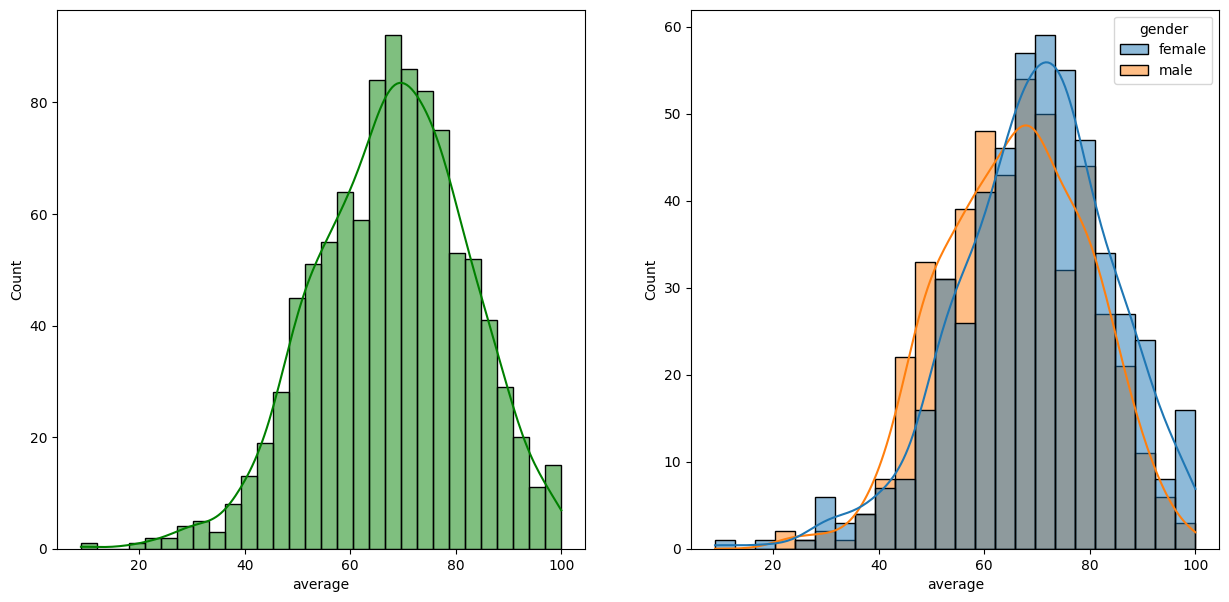

In [37]:
#histogram and KDE(Kernel Density Estimation)

fig, axs = plt.subplots(1, 2, figsize = (15, 7))

plt.subplot(121)
sns.histplot(data = df, x = "average", bins = 30, kde = True, color = "g")

plt.subplot(122)
sns.histplot(data = df, x = "average", kde = True, hue = "gender")
plt.show()

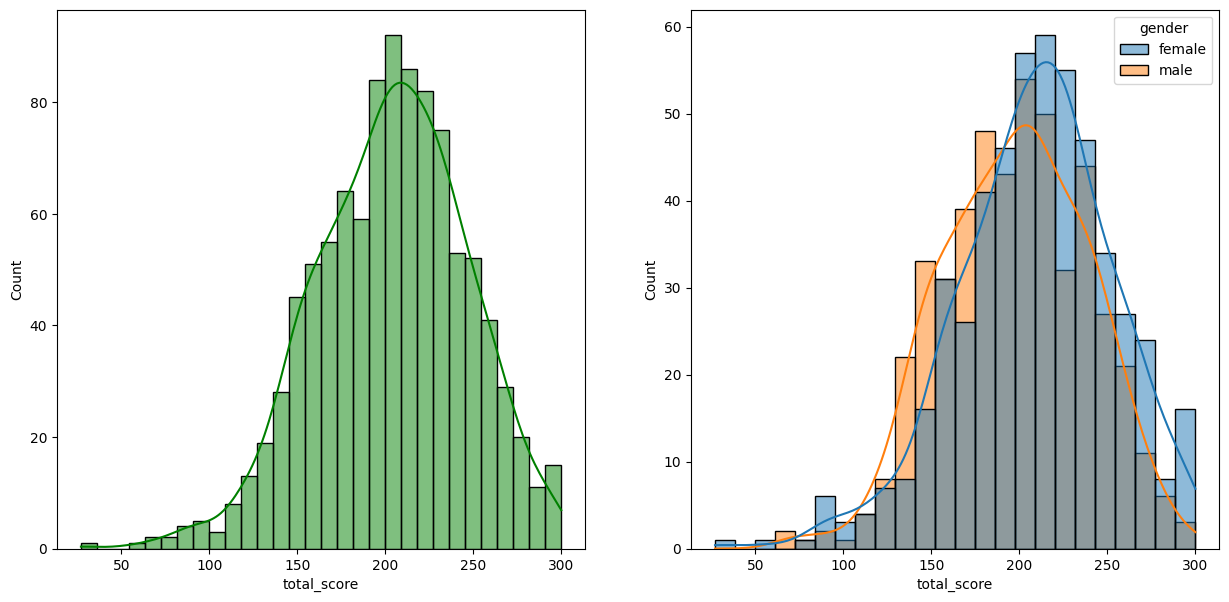

In [38]:
#histogram and KDE(Kernel Density Estimation)

fig, axs = plt.subplots(1, 2, figsize = (15, 7))

plt.subplot(121)
sns.histplot(data = df, x = "total_score", bins = 30, kde = True, color = "g")

plt.subplot(122)
sns.histplot(data = df, x = "total_score", kde = True, hue = "gender")
plt.show()

Both histplot this and above of it shows that, `female` perform well in both 'average' and 'total' marks

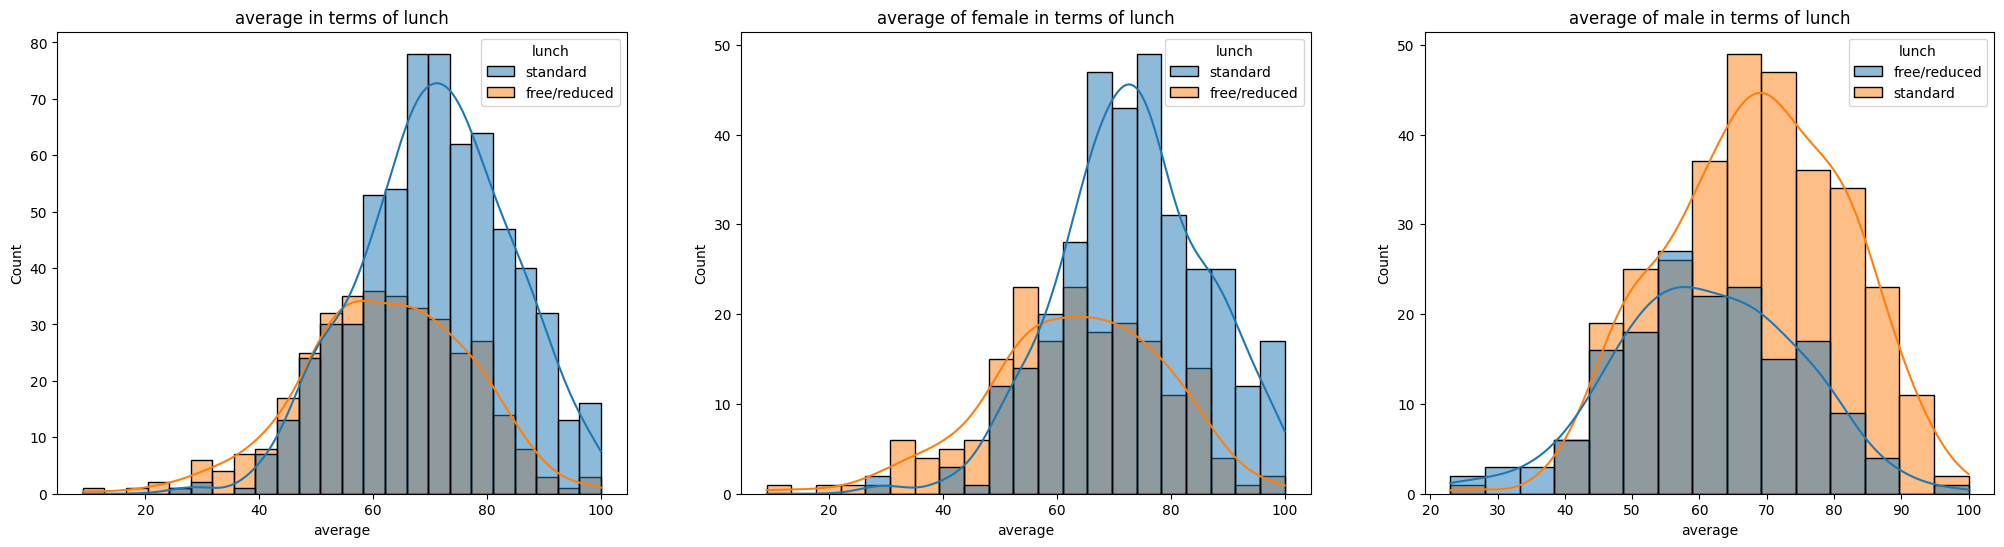

In [47]:
#histogram and KDE(Kernel Density Estimation)

plt.subplots(1, 3, figsize = (25, 6))

plt.subplot(131)
plt.title("average in terms of lunch")
sns.histplot(data = df, x = "average", kde = True, hue = "lunch")

plt.subplot(132)
plt.title("average of female in terms of lunch")
sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "lunch")

plt.subplot(133)
plt.title("average of male in terms of lunch")
sns.histplot(data = df[df.gender == "male"], x = "average", kde = True, hue = "lunch")

plt.show()

- All 3 subplots concluded that `Standard lunch` preform well in exam, no matter who it is, it may be male or female

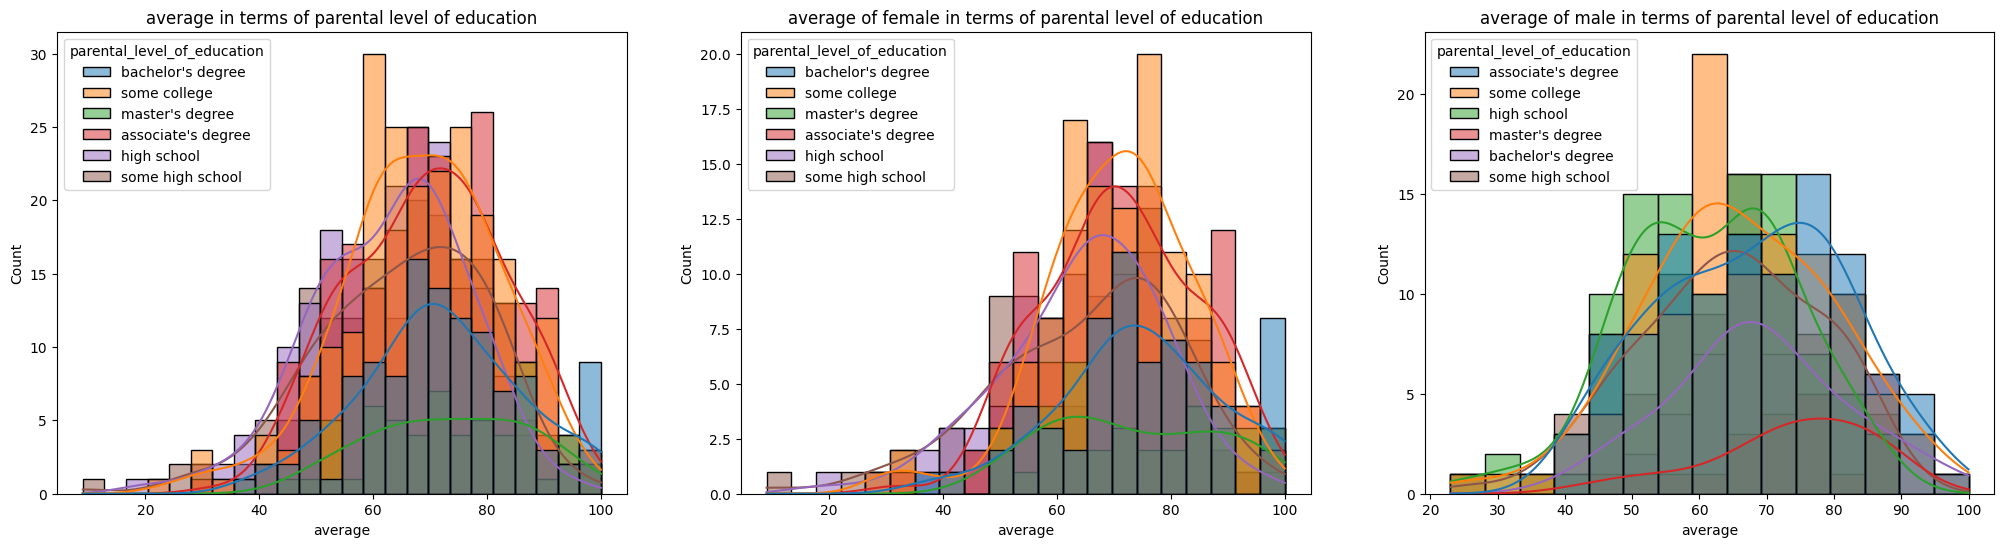

In [44]:
#histogram and KDE(Kernel Density Estimation)

plt.subplots(1, 3, figsize = (25, 6))

plt.subplot(131)
plt.title("average in terms of parental level of education")
sns.histplot(data = df, x = "average", kde = True, hue = "parental_level_of_education")

plt.subplot(132)
plt.title("average of female in terms of parental level of education")
sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "parental_level_of_education")

plt.subplot(133)
plt.title("average of male in terms of parental level of education")
sns.histplot(data = df[df.gender == "male"], x = "average", kde = True, hue = "parental_level_of_education")

plt.show()

- subplot 1 shows that parental level of education not affects the marks of student either it male or female
- subplot 2 which consist of average marks of only female concluded that parent's whose education is 'some college' or 'associates degree' their female child tend to perform well in the exam
- subplot 2 which consist of average marks of only male concluded that parent's whose education is 'associated degree' or 'high school' degree their male child tend to perform well in the exam

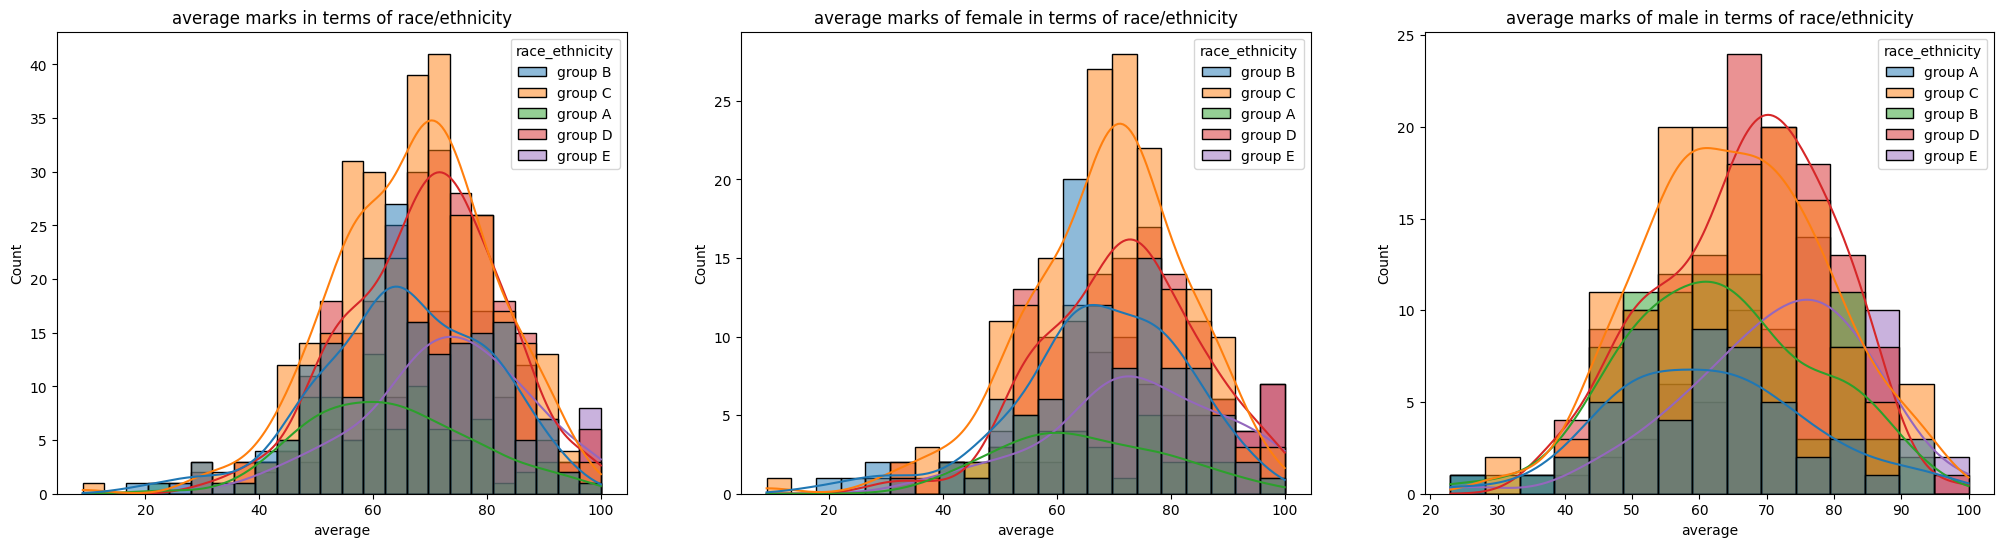

In [49]:
#histogram and KDE(Kernel Density Estimation) in terms of race/ethnicity

plt.subplots(1, 3, figsize = (25, 6))

plt.subplot(131)
plt.title("average marks in terms of race/ethnicity")
sns.histplot(data = df, x = "average", kde = True, hue = "race_ethnicity")

plt.subplot(132)
plt.title("average marks of female in terms of race/ethnicity")
sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "race_ethnicity")

plt.subplot(133)
plt.title("average marks of male in terms of race/ethnicity")
sns.histplot(data = df[df.gender == "male"], x = "average", kde = True, hue = "race_ethnicity")

plt.show()

- subplot 1 concluded the more number of student are belong to group C, and D
- subplot 2 concluded group C and D female students performed well in exam
- subplot 3 concluded group D male students performed well in exam

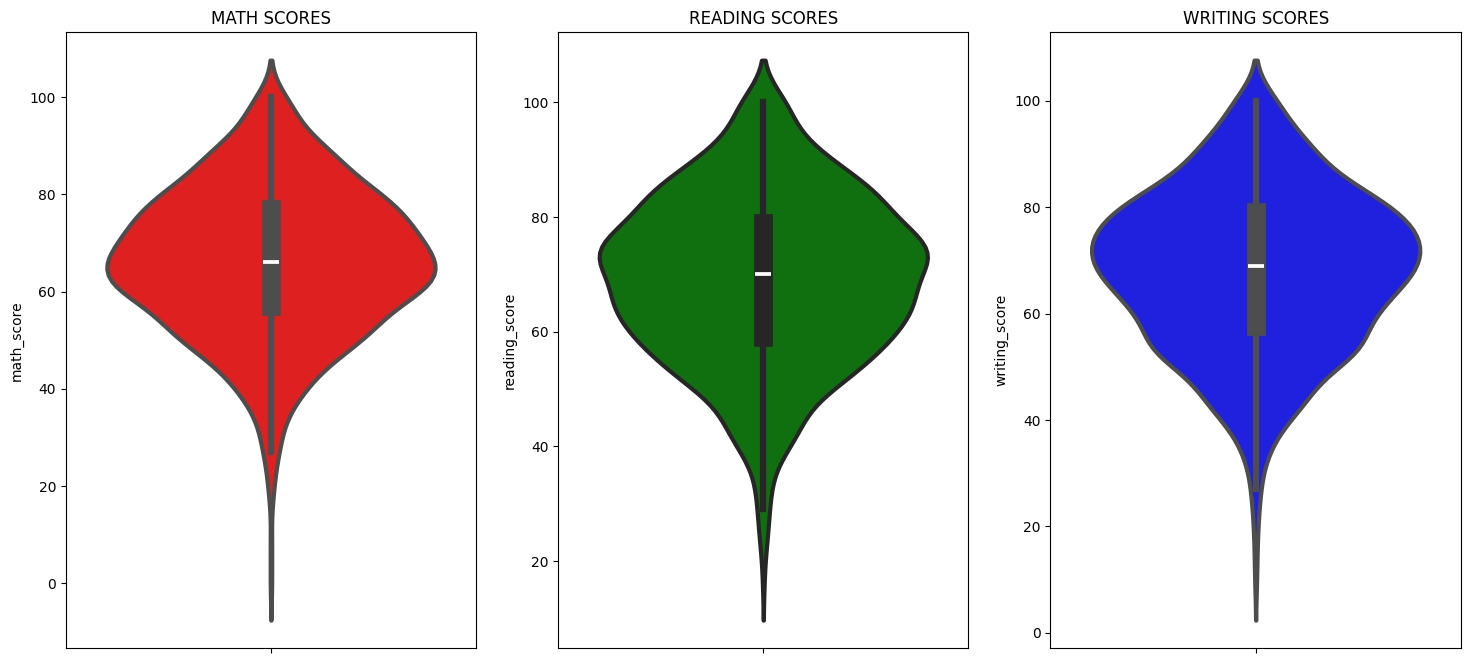

In [54]:
#Maximumum score of students in all three subjects
plt.subplots(1, 3, figsize = (18, 8))

plt.subplot(131)
plt.title("MATH SCORES")
sns.violinplot(data = df, y = "math_score", color = "red", linewidth = 3)

plt.subplot(132)
plt.title("READING SCORES")
sns.violinplot(data = df, y = "reading_score", color = "green", linewidth = 3)

plt.subplot(133)
plt.title("WRITING SCORES")
sns.violinplot(data = df, y = "writing_score", color = "blue", linewidth = 3)

plt.show()

- Subplot 1 concluded most of student score between 50 to 80 marks
- subplot 2 concluded most of student score between 60 to 85 marks
- subplot 3 concluded most of student score between 60 to 85 marks


In [56]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


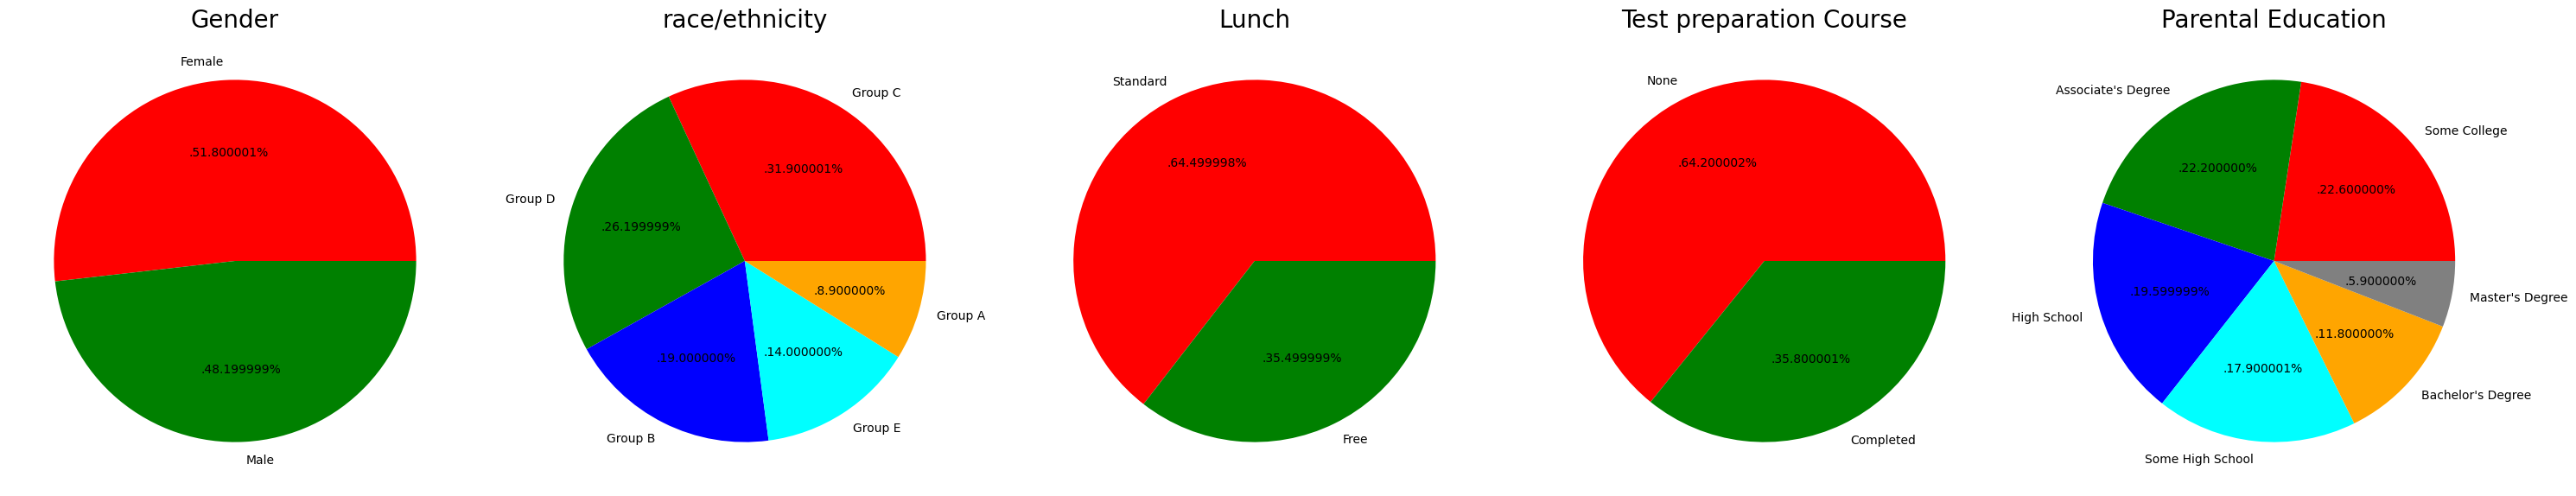

In [58]:
#bar chart of all students based on different features
plt.rcParams['figure.figsize'] = (30, 12)

#for gender feature
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

#for race/ethnicity feature
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis('off')

#for lunch feature
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

#for test preparation score feature
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test preparation Course', fontsize = 20)
plt.axis('off')

#for parental level of education feature
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

- Subplot 1 concluded there are 51.80% female and 48.19% male students are in data
- Subplot 2 concluded students related to Group D are maximum with 26.19% share and Group A are minimum with 8.90% share
- Subplot 3 concluded there are 64.49% are standard lunch and 35.49% free lunch of students
- subplot 4 concluded there are only 35.80% students who completed their test preparation course while 64.20% hadn't still completed the course
- Subplot 5 concluded max students are belong to parents whose education is 'some college' followed by 'assciated degree', 'high school' ... while parents has 'master degree' has min no of students

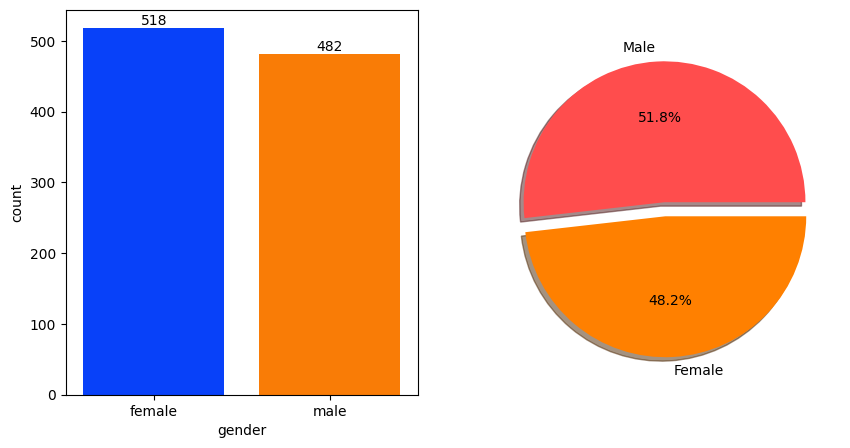

In [60]:
fig ,ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x=df['gender'], data=df, palette ='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'],
        explode=[0,0.1], autopct='%1.1f%%', shadow=True,
        colors=['#ff4d4d','#ff8000'])
        
plt.show()

- Above subplots concluded total 518(51.8%) are female students and total 482(48.2%) are male students from dataset

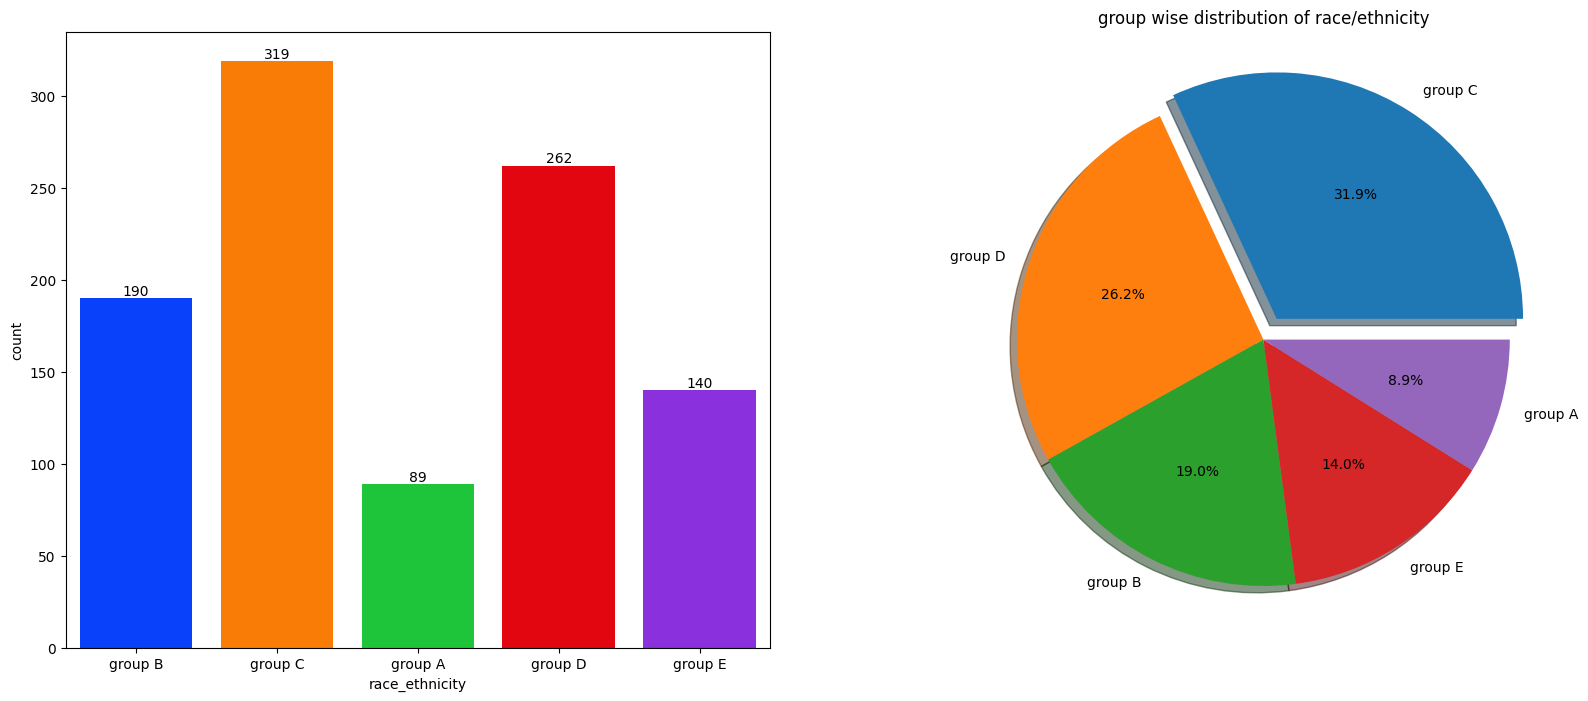

In [107]:
#group wise distribution of race/ethnicity
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
plt.title("group wise distribution of race/ethnicity")

sns.countplot(x= df['race_ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size=10)
    
plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index,
                explode = [0.1, 0, 0, 0, 0], autopct = '%1.1f%%', shadow=True)
plt.show()

- Most of the students are belong to Group C with 319 i.e. 31.9% share in data followed by Group D with 262 i.e. 26.2% share in data and so on.
- Group A has minimum number of students with 8.9% share in data

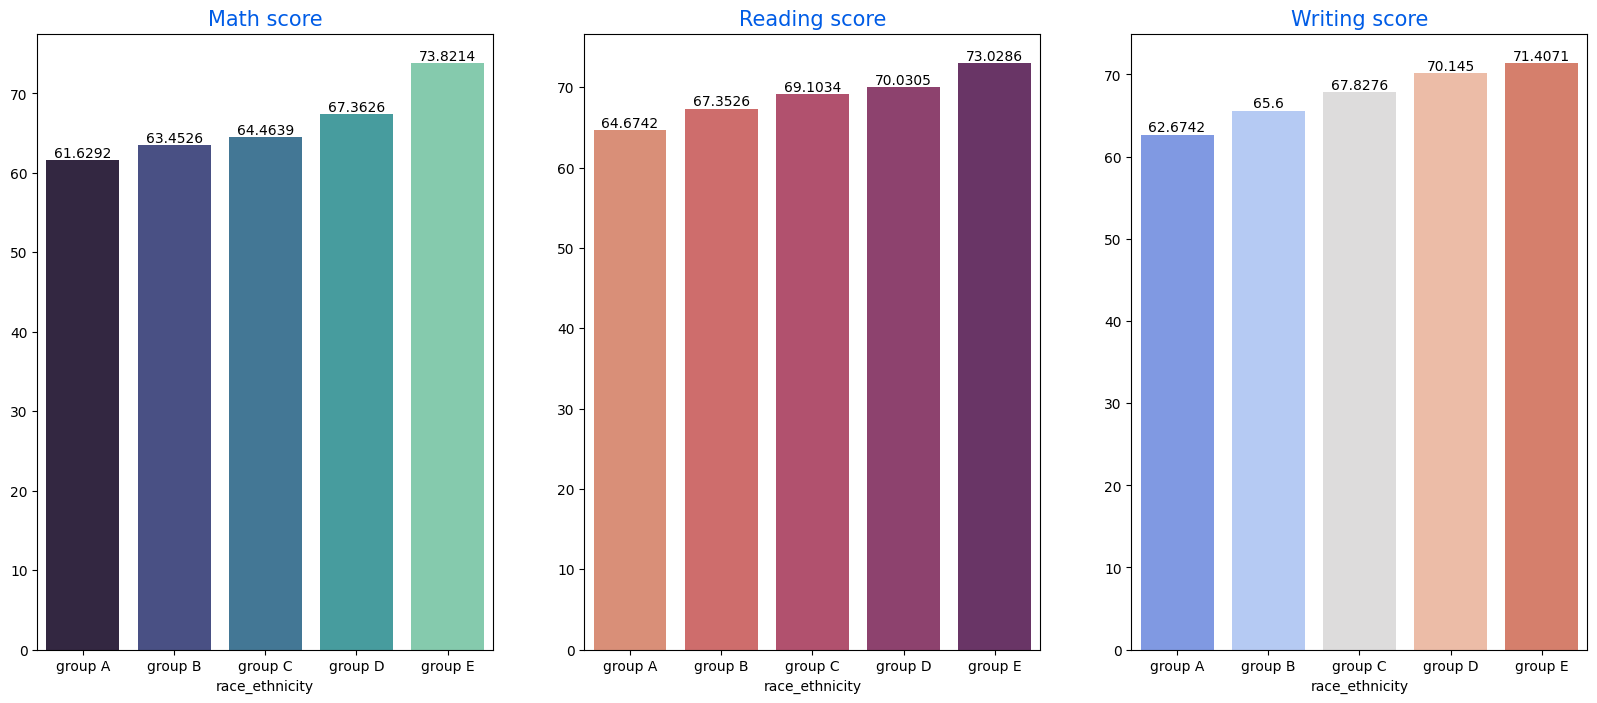

In [110]:
Group_data2=df.groupby('race_ethnicity')

fig, ax = plt.subplots(1, 3, figsize = (20, 8))

#math score
sns.barplot(x = Group_data2['math_score'].mean().index, y = Group_data2['math_score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math score', color = '#005ce6', size = 15)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size=10)

#reading score
sns.barplot(x = Group_data2['reading_score'].mean().index, y = Group_data2['reading_score'].mean().values, palette = 'flare', ax = ax[1])
ax[1].set_title('Reading score', color = '#005ce6', size = 15)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

#writing score
sns.barplot(x = Group_data2['writing_score'].mean().index,y = Group_data2['writing_score'].mean().values,palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing score', color = '#005ce6', size = 15)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 10)

- Students belongs to group E has maximum score on all subjects including math, reading and writing score
- students belongs to group A has minimum score on all subjects including math, reading and writing score

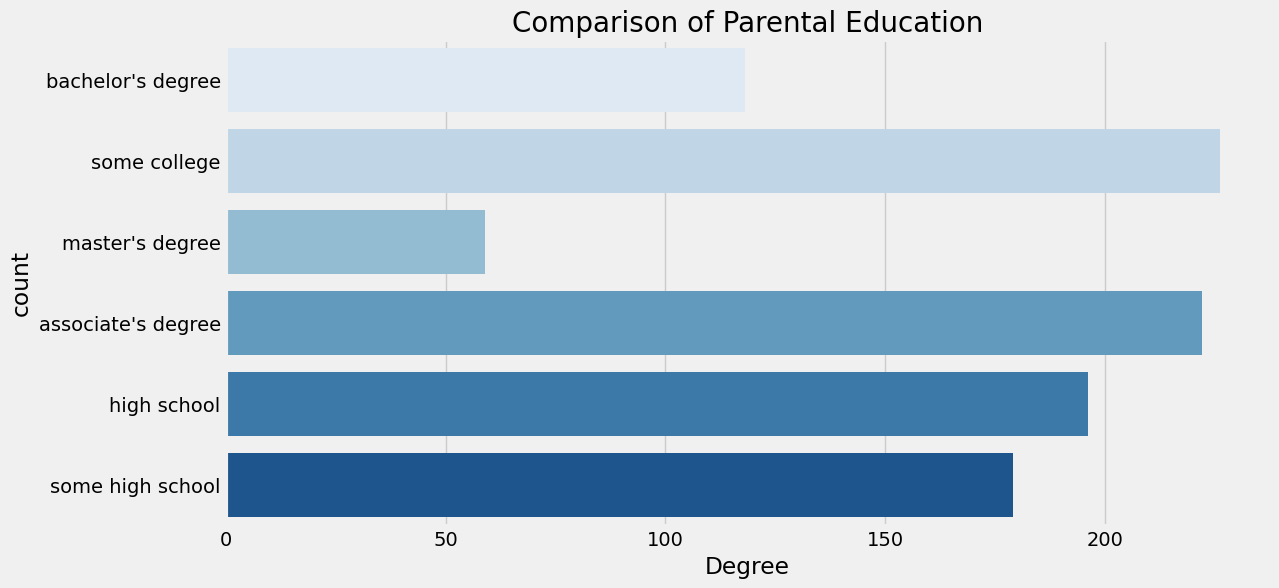

In [115]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 20, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Maximum number of students's parents has 'some college' degree

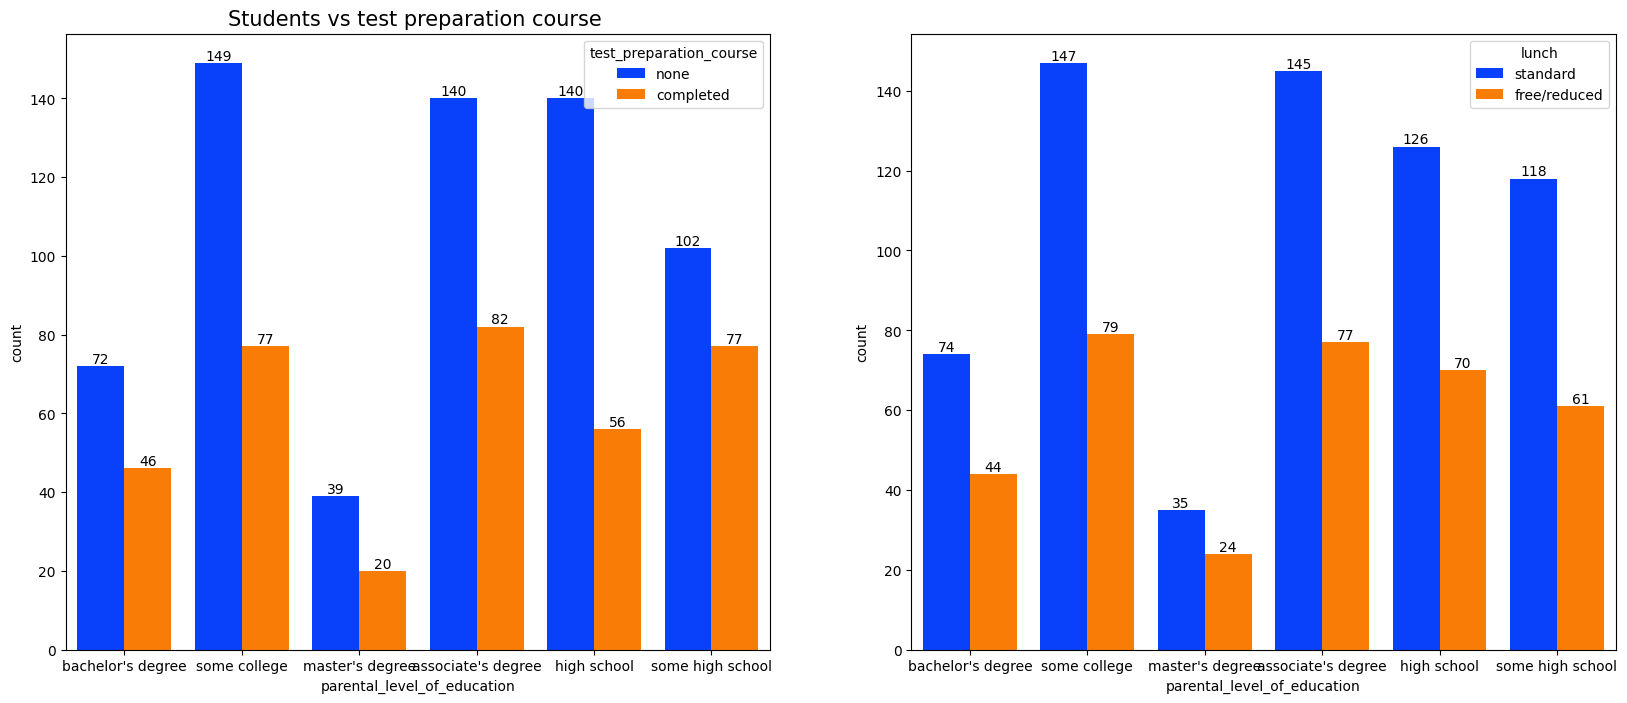

In [97]:
#Students vs test preparation course
fig, ax= plt.subplots(1, 2, figsize=(20,8))

sns.countplot(x = df['parental_level_of_education'], data = df, palette = 'bright', hue='test_preparation_course', saturation=0.95, ax = ax[0])
ax[0].set_title('Students vs test preparation course ', color='black', size=15)
for container in ax[0].containers:
    ax[0].bar_label(container, color= 'black', size=10)
    
sns.countplot(x=df['parental_level_of_education'], data = df, palette = 'bright', hue='lunch', saturation = 0.95, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)  

- Subplot 1 concluded students whose parents has only 'some college' degree maximum not completed the test preparation course i.e. 149 while its comes second for completed the maximum number of test preparation course i.e. 77 after 'associate degree' with 82 completed and 140 not completed and it also concluded that maximum students not completed the course preparation test
- Subplot 2 concluded there are maximum number of students with 'standard' lunch among which 'some college' degree parents is on top followed by 'associated degree', 'high school degree', ...

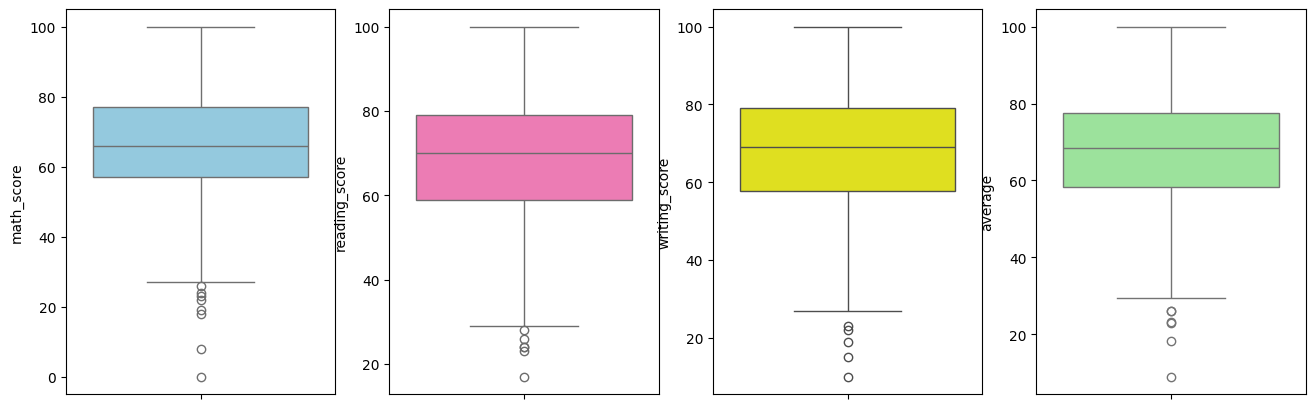

In [98]:
#finding the outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

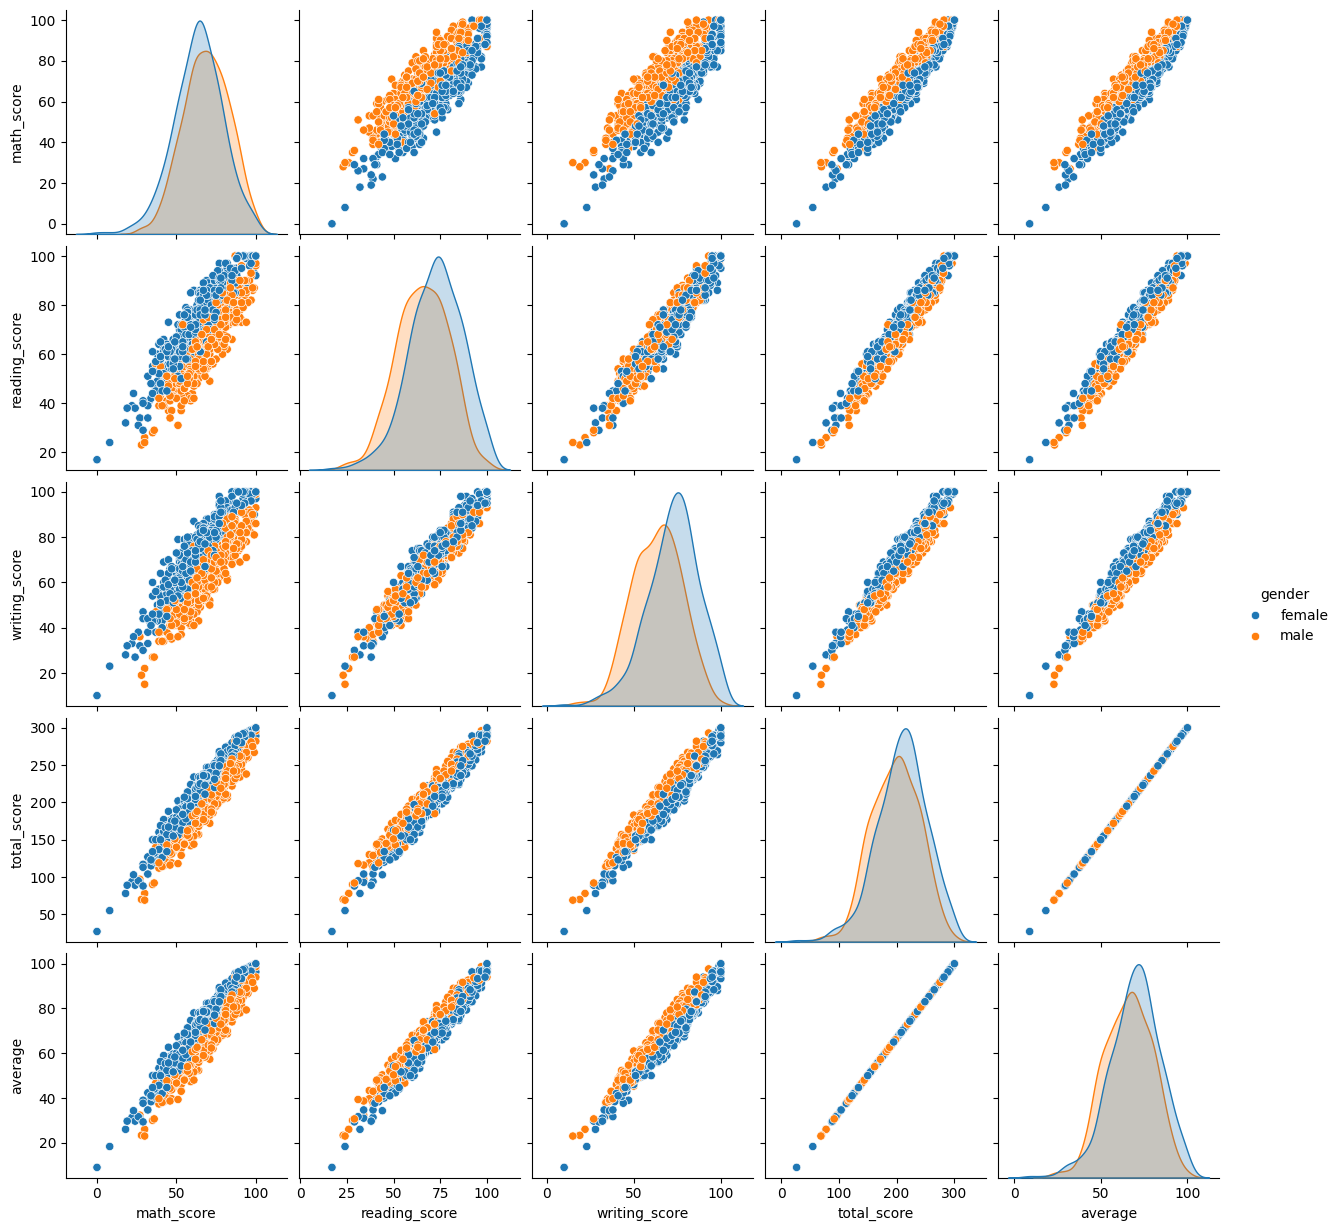

In [99]:
#pair of plots respect with gender as feature
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusion :
1. Student's Performance is related with lunch, race, parental level education
1. Females lead in pass percentage and also are top-scorers
1. Finishing preparation course is benefitial.
1. Standard lunch preform well in exam, no matter who it is, it may be male or female
1. the more number of student are belong to group C, and D whereas group E has maximum scores and group A has minimum scores
1. Average number of students lies between 60-80 scores in exams
1. Maximum number of students's parents has 'some college' degree